In [1]:
import sys
import os
from scipy.optimize import curve_fit

# Get the project root (one level above notebooks/)
project_root = os.path.abspath("..")
sys.path.append(project_root)

print("Added to Python path:", project_root)

import h5py
import numpy as np
import pandas as pd
# from src.parameters.tail_features import compute_LQ80


Added to Python path: c:\Users\YooNi\OneDrive\Desktop\Majorana-Neutrino-Hunt


In [ ]:
# train_file = "../data/old/MJD_Train_0.hdf5"

# with h5py.File(train_file, "r") as f:
#     waveforms = np.array(f["raw_waveform"])
#     ids = np.array(f["id"])

# print("Loaded", len(waveforms), "waveforms")

Loaded 65000 waveforms


In [3]:
def compute_PPR(waveform, n_plateau=300):
    """
    Peak Plateau Ratio (PPR)

    Measures how much the waveform "flattens" toward the end of the trace.
    Defined as:

        PPR = (mean of last n_plateau samples) / (peak height)

    Parameters
    ----------
    waveform : array-like
        The raw waveform.
    n_plateau : int
        Number of samples to use at the end for averaging the plateau.

    Returns
    -------
    float
        The Peak Plateau Ratio. NaN if peak is zero.
    """
    y = np.asarray(waveform, dtype=float)

    peak_val = float(np.max(y))
    if peak_val <= 0:
        return np.nan  # avoid division by zero or negative peak

    # Average of last N samples (plateau region)
    plateau = float(np.mean(y[-n_plateau:]))

    return plateau / peak_val

In [ ]:
# # compute PPR for everything
# PPR_values = []

# # for i, wf in enumerate(waveforms):
# #     val = compute_PPR(wf)
# #     PPR_values.append(val)
# for i, wf in enumerate(waveforms):
#     if i % 5000 == 0:
#         print(f"Processing {i} / {len(waveforms)}")
#     PPR_values.append(compute_PPR(wf))


# PPR_values = np.array(PPR_values, dtype=float)
# PPR_values[~np.isfinite(PPR_values)] = np.nan

Processing 0 / 65000
Processing 5000 / 65000
Processing 10000 / 65000
Processing 15000 / 65000
Processing 20000 / 65000
Processing 25000 / 65000
Processing 30000 / 65000
Processing 35000 / 65000
Processing 40000 / 65000
Processing 45000 / 65000
Processing 50000 / 65000
Processing 55000 / 65000
Processing 60000 / 65000


In [5]:
# output
formatted_ids = [f"{id_}_train_0" for id_ in ids]

df = pd.DataFrame({
    "id": formatted_ids,
    "PPR": PPR_values
})

In [6]:
output_path = "PPR_train_0.csv"
df.to_csv(output_path, index=False)
print("Saved to", output_path)
print(df.head())

Saved to PPR_train_0.csv
          id       PPR
0  0_train_0  0.719376
1  1_train_0  0.729709
2  2_train_0  0.715390
3  3_train_0  0.769375
4  4_train_0  0.728165


In [7]:
print(df["PPR"].describe())
print("NaNs:", df["PPR"].isna().sum())

count    65000.000000
mean         0.725513
std          0.026798
min          0.393105
25%          0.708996
50%          0.721175
75%          0.736245
max          0.971191
Name: PPR, dtype: float64
NaNs: 0


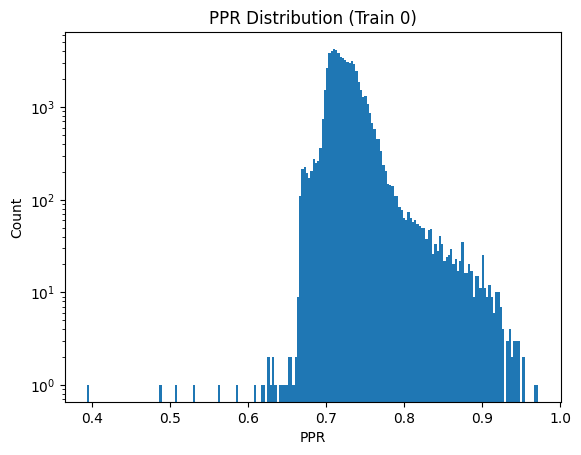

In [8]:
import matplotlib.pyplot as plt
import numpy as np

vals = df["PPR"].to_numpy(dtype=float)
vals = vals[np.isfinite(vals)]

plt.figure()
plt.hist(vals, bins=200)
plt.yscale("log")
plt.xlabel("PPR")
plt.ylabel("Count")
plt.title("PPR Distribution (Train 0)")
plt.show()
